<a href="https://colab.research.google.com/github/jennyked/nrw-data-analytics/blob/main/Lady_tasting_tea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Lady Tasting Tea **
The lady tasting tea is a randomized experiment devised by Ronald Fisher and reported in his book The Design of Experiments (1935). The experiment is the original exposition of Fisher's notion of a null hypothesis, which is "never proved or established, but is possibly disproved, in the course of experimentation".






# **Experimental Design**

The experiment provides a subject with 8 randomly ordered cups of tea – 4 prepared by first pouring the tea, then adding milk, 4 prepared by first pouring the milk, then adding the tea. The subject has to select 4 cups prepared by one method. Judging cups by direct comparison is allowed. The method employed in the experiment is fully disclosed to the subject. 

The aim is to calculate the number of cups that the woman can guess correctly only by chance, by using the cup in which 4 milk is poured first and 4 tea is poured first, and to make an inference on the accuracy of the claim. The task of the woman is to divide the cups into two groups according to the order in which the tea and milk are poured. For this, she must correctly classify and select 4 cups from the same group.

In [ ]:

#Define cups
cups =list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
# Number of options to select 4 out of 8 cups:

pnum = (8*7*6*5*4*3*2*1)/((4*3*2*1)*(4*3*2*1))
print(pnum)

70.0


A combinatorial approach was taken to enlist all the outcomes, which in this case is 70. 

1)There is only one possibility among 70 to get all of them right. 

2)There are 16 ways to choose 3 correct and 1 incorrect cup, similarly, 16 ways to choose 1 correct and 3 incorrect cups

3)There are 36 ways to choose 2 correct and 2 wrong cups.

4)There is one possibility among 70 to get all of them wrong. 







In [ ]:
#Approach for 4 choose 4
try: 
    from scipy.special import comb, logsumexp
except ImportError:
    from scipy.misc import comb, logsumexp
comb(4,4)

1.0

In [ ]:
#The probability to select correctly 4 cups:
prob = (1/70) 
print(f"The probability to select correctly 4 out of 8 cups = {prob}")

The probability to select correctly 4 out of 8 cups = 0.014285714285714285


In [ ]:
#Approach for 4 choose 3 correctly
try: 
    from scipy.special import comb, logsumexp
except ImportError:
    from scipy.misc import comb, logsumexp
comb(4,3)

4.0

In [ ]:
#Approach for 4 choose 1 wrong cup 
try: 
    from scipy.special import comb, logsumexp
except ImportError:
    from scipy.misc import comb, logsumexp
comb(4,1)

4.0

In [ ]:
#The probability to select correctly 3 correct cups and 1 wrong cup:
prob16 = (16/70) 
print(f"The probability to select correctly 3 correct and 1 wrong cup = {prob16}")

The probability to select correctly 3 correct and 1 wrong cup = 0.22857142857142856


In [ ]:
#The probability to select correctly 2 correct cups and 2 wrong cups:

try: 
    from scipy.special import comb, logsumexp
except ImportError:
    from scipy.misc import comb, logsumexp
comb(4,2)

6.0

In [ ]:
#The probability to select correctly 2 correct cups and 2 wrong cups:

prob36 = (36/70) 
print(f"The probability to select correctly 2 correct and 2 wrong cups = {prob36}")

The probability to select correctly 2 correct and 2 wrong cups = 0.5142857142857142


In [ ]:
#The probability to select correctly 1 correct cup and 3 wrong cups:
prob161 = (16/70) 
print(f"The probability to select correctly 1 correct and 3 wrong cups = {prob161}")

The probability to select correctly 1 correct and 3 wrong cups = 0.22857142857142856


In [ ]:
#The probability to select correctly 4 out of 8 cups:
prob1 = (1/70) 
print(f"The probability to select wrongly 4 out of 8 cups = {prob1}")

The probability to select wrongly 4 out of 8 cups = 0.014285714285714285


In [ ]:
import matplotlib.pyplot as plt


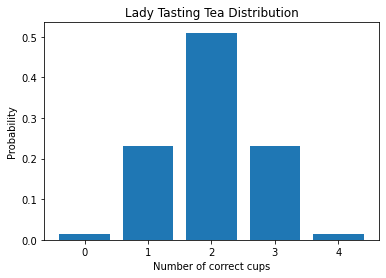

In [ ]:

# x axis values is the number of cups correctly chosen
x = [4,3,2,1,0]
# corresponding y axis values is the probability
y = [0.014,0.23,0.51,0.23, 0.014]
 
# plotting the points
plt.bar(x, y)
 
# naming the x axis
plt.xlabel('Number of correct cups')
# naming the y axis
plt.ylabel('Probability')
 
# giving a title to my graph
plt.title('Lady Tasting Tea Distribution')
 
# function to show the plot
plt.show()

## Conclusion
The null hypothesis is that the woman does not have such a talent and an inference can be made by reasoning over the p-value in the statistics in the experiment. For this reason, it is necessary to assume that the woman does not have such a talent and to calculate the ratio of possible successes to all probabilities, which may occur in a completely random way.


It can be said that the p-value determines whether the result is statistically significant. If the result obtained is less than 0.05 (5%), the null hypothesis is rejected, that is, the result found is interpreted as statistically significant.

The case of all cups are placed correctly that is, 0.014, is statistically significant (because of 0.014 < 0.05). This means that the null hypothesis is rejected and the woman indeed does have talent to choose. Although seen from the analysis above the probability(1/70) is extremely rare.

On the other hand, the case of at least 3 of 4 cups are placed correctly, that is, 0.243, is not statistically significant based on the p-value ( because of 0.243>0.05), it is considered statistically insignificant if the woman predicts 3 out of 4 glasses. This means that a single mistake made by the woman will reduce her performance below the level of significance. In such a case, the experiment is either repeated or the elements are expanded.

In [ ]:
# # How many cups of tea with milk does one have to prepare and serve in the context of a to blind-test to a tea connoisseur in order to make sure that he/she can truly distinguish those cups in which
#  milk has been poured after the tea from those for which the order has been inverted?

From the Ronald Fisher lady tasting tea, to be able to blind-taste tea, a larger sample size is needed. In the Lady Tasting Tea test, the probability to blindly taste tea was quite limited as the sample size of 8 cups wasnt sufficient. To differentiate between the milk and tea cups, a statistical significance is seen from ten sample size and above. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ar=np.array([[4, 0],[0, 4]])    
df=pd.DataFrame(ar, columns=["Milk", "Tea"])
df.index=["Milk", "Tea"] 
df 

,Milk,Tea
Milk,4,0
Tea,0,4


In [ ]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact([[4, 0],[0, 4]])  
pvalue

0.028571428571428536

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#All combinations:
from itertools import combinations
poss = list(itertools.combinations(cups,4))
print("Length = ", len(poss))
print(poss)

Length =  70
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 3, 6), (0, 1, 3, 7), (0, 1, 4, 5), (0, 1, 4, 6), (0, 1, 4, 7), (0, 1, 5, 6), (0, 1, 5, 7), (0, 1, 6, 7), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 3, 6), (0, 2, 3, 7), (0, 2, 4, 5), (0, 2, 4, 6), (0, 2, 4, 7), (0, 2, 5, 6), (0, 2, 5, 7), (0, 2, 6, 7), (0, 3, 4, 5), (0, 3, 4, 6), (0, 3, 4, 7), (0, 3, 5, 6), (0, 3, 5, 7), (0, 3, 6, 7), (0, 4, 5, 6), (0, 4, 5, 7), (0, 4, 6, 7), (0, 5, 6, 7), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 4, 7), (1, 2, 5, 6), (1, 2, 5, 7), (1, 2, 6, 7), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 4, 7), (1, 3, 5, 6), (1, 3, 5, 7), (1, 3, 6, 7), (1, 4, 5, 6), (1, 4, 5, 7), (1, 4, 6, 7), (1, 5, 6, 7), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 4, 7), (2, 3, 5, 6), (2, 3, 5, 7), (2, 3, 6, 7), (2, 4, 5, 6), (2, 4, 5, 7), (2, 4, 6, 7), (2, 5, 6, 7), (3, 4, 5, 6), (3, 4, 5, 7), (3, 4, 6, 7), (3, 5, 6, 7), (4, 5, 6, 7)]


In [ ]:
#Random selection
dist_vals = []

for i in poss:
    
    # Random Choice from combinations
    rc = set(random.choice(poss))
    
    # Iterate over sample from combinations
    ii = set(i)
    
    print("Random Choice = ", rc, " | Length = ", len(rc))
    print("\nSample = ", ii, " | Length = ", len(ii))
    print("\nSuccess = ", rc&ii, " | Length = ", len(rc&ii))
    dist_vals.append(len(rc&ii))
    print("\n\n==========================================\n")

Random Choice =  {1, 2, 4, 6}  | Length =  4

Sample =  {0, 1, 2, 3}  | Length =  4

Success =  {1, 2}  | Length =  2



Random Choice =  {0, 1, 3, 6}  | Length =  4

Sample =  {0, 1, 2, 4}  | Length =  4

Success =  {0, 1}  | Length =  2



Random Choice =  {3, 4, 6, 7}  | Length =  4

Sample =  {0, 1, 2, 5}  | Length =  4

Success =  set()  | Length =  0



Random Choice =  {2, 4, 5, 6}  | Length =  4

Sample =  {0, 1, 2, 6}  | Length =  4

Success =  {2, 6}  | Length =  2



Random Choice =  {1, 2, 5, 7}  | Length =  4

Sample =  {0, 1, 2, 7}  | Length =  4

Success =  {1, 2, 7}  | Length =  3



Random Choice =  {0, 1, 5, 6}  | Length =  4

Sample =  {0, 1, 3, 4}  | Length =  4

Success =  {0, 1}  | Length =  2



Random Choice =  {0, 1, 3, 6}  | Length =  4

Sample =  {0, 1, 3, 5}  | Length =  4

Success =  {0, 1, 3}  | Length =  3



Random Choice =  {0, 4, 5, 6}  | Length =  4

Sample =  {0, 1, 3, 6}  | Length =  4

Success =  {0, 6}  | Length =  2



Random Choice =  {0, 1, 2, 

In [ ]:
try: 
    from scipy.special import comb, logsumexp
except ImportError:
    from scipy.misc import comb, logsumexp
comb(8,4)

70.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


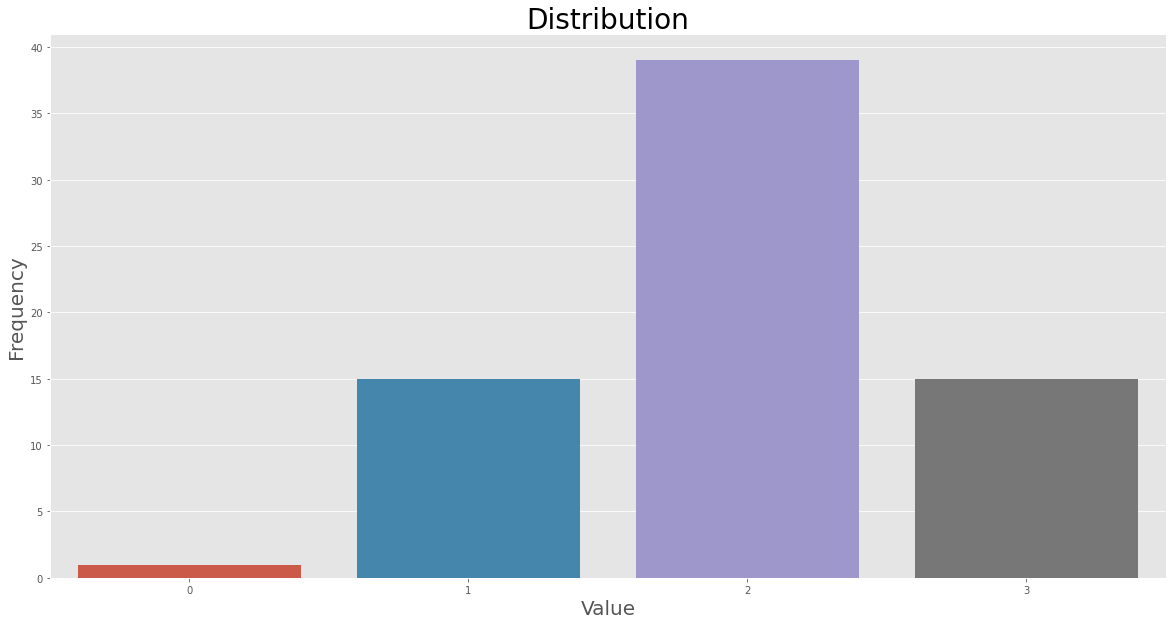

,Key,Value,Percentage
1,0,1,0.014286
3,1,15,0.214286
0,2,39,0.557143
2,3,15,0.214286


In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(dist_vals)
plt.xlabel("Value", size = 20)
plt.ylabel("Frequency", size = 20)
plt.title("Distribution", size = 28)
plt.show()

dKeys = Counter(dist_vals).keys()
dVals = Counter(dist_vals).values()
df_vals = pd.DataFrame({"Key":dKeys, "Value":dVals})

tot = np.sum(list(dVals))
percentages = []
for k in range(len(df_vals)):
    percentages.append(df_vals['Value'][k]/tot)
df_vals["Percentage"] = percentages

df_vals.sort_values("Key")
